# Single Layer Perceptron to classify the output of an XOR gate.

XOR gate's truth table

In [9]:
import numpy as np
import pandas as pd

# XOR truth table inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


Perceptron model

In [39]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Training the model
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation_function(x) for x in linear_output])

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Make predictions
predictions = perceptron.predict(X)
print("Predictions for XOR:", predictions)


Predictions for XOR: [1 1 0 0]


Since the XOR problem is not linearly separable, we observe that the single-layer perceptron is not able to correctly classify all the output classes(0's and 1's). The output shows that it is not able to classify correctly.

Expected Output: [0,1,1,0]
Actual Output: [1,1,0,0], failing to correctly classify XOR.

This happens because XOR is not linearly separable and therefore a single layer perceptron is not able to classify the XOR. As we see in the XOR truth table, no straight line can perfectly separate the output classes. Therefore, a single-layer perceptron cannot solve this problem.

XOR using Multi-Layer Perceptron.

In [55]:
from sklearn.neural_network import MLPClassifier

# Create MLP model with fixed random state
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000, random_state=56)

# Train the MLP on XOR data
mlp.fit(X, y)

# Make predictions
mlp_predictions = mlp.predict(X)
print("MLP Predictions for XOR:", mlp_predictions)


MLP Predictions for XOR: [0 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Visualization

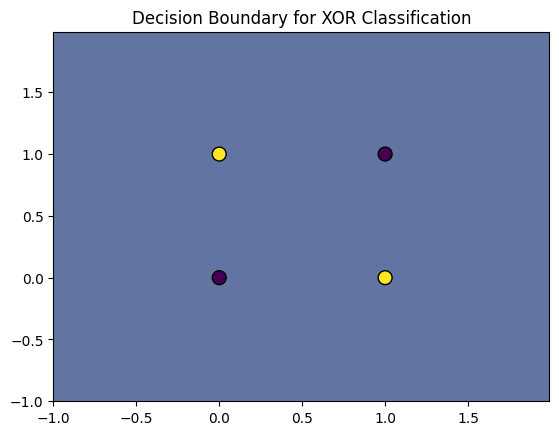

In [29]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict for every point on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=100, edgecolor='k')
    plt.title("Decision Boundary for XOR Classification")
    plt.show()

# Plot decision boundary for MLP
plot_decision_boundary(X, y, mlp)


# Sentiment Analysis Twitter Airline

In [3]:
import pandas as pd

# Load the dataset
file_path = "/content/Tweets.csv"
df = pd.read_csv(file_path)
print(df.head())


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

X = df['text']
y = df['airline_sentiment']

# Vectorize the text data
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_vectorized = vectorizer.fit_transform(X).toarray()

# Encode the sentiment labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)


We preprocess the dataset by extracting the relevant features and labels for analysis. The text data is vectorized using a Bag of Words model, which converts the textual information into numerical format while filtering out common stop words. Sentiment labels are then encoded into a numerical format suitable for classification. Finally, the dataset is divided into training and testing sets, ensuring that the model can be effectively trained and evaluated on distinct data portions.

In [6]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU for backpropagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Derivative of tanh for backpropagation
def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Define a basic Feed-Forward Neural Network with backpropagation
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid', learning_rate=0.01):
        # Initialize weights randomly
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.learning_rate = learning_rate

        # Choose activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative

    def forward(self, X):
        # Forward propagation
        self.hidden_input = np.dot(X, self.weights_input_hidden)
        self.hidden_output = self.activation(self.hidden_input)

        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output)
        self.final_output = sigmoid(self.final_input)  # Output layer uses sigmoid for binary classification
        return self.final_output

    def backward(self, X, y, output):
        # Backward propagation to update weights
        error = y - output  # Error in output layer
        output_delta = error * sigmoid_derivative(output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.activation_derivative(self.hidden_output)

        # Update weights
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate

    def train(self, X, y, epochs=1000):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # Calculate and store the loss (mean squared error)
            loss = np.mean((y - output) ** 2)
            losses.append(loss)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

        return losses

    def predict(self, X):
        output = self.forward(X)
        # Binary classification: round the output to 0 or 1
        return np.round(output)


Implementing a simple feed-forward neural network with backpropagation. We define various activation functions: sigmoid, ReLU, and tanh. The "SimpleNeuralNetwork" class initializes the network with random weights and allows the user to select an activation function. The "forward" method performs forward propagation, calculating outputs through the network. The "backward" method updates the weights based on the error between predicted and actual outputs, using gradient descent. The training process is executed for a specified number of epochs, calculating the mean squared error loss.

Epoch 0, Loss: 0.6124998666046387
Epoch 100, Loss: 0.35957255503498065
Epoch 200, Loss: 0.3097612367281376
Epoch 300, Loss: 0.2868465251616022
Epoch 400, Loss: 0.2934806336713624
Epoch 500, Loss: 0.2659309226810549
Epoch 600, Loss: 0.2460844388466548
Epoch 700, Loss: 0.2405045477936976
Epoch 800, Loss: 0.23641507667669842
Epoch 900, Loss: 0.2329582506914111


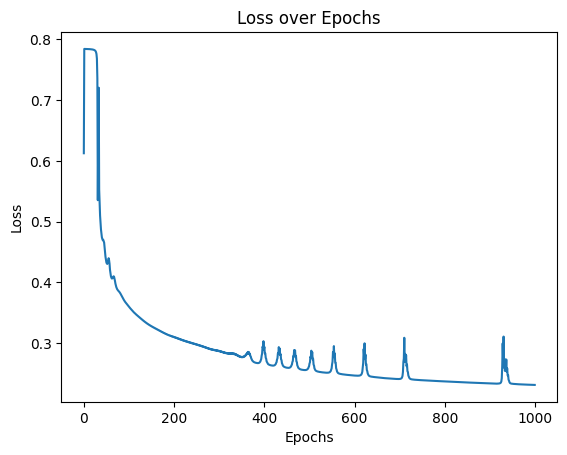

Test Set Accuracy: 66.56%


In [7]:
# Convert labels to the right shape for binary classification
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Initialize the model with the activation function ('sigmoid', 'relu', 'tanh')
nn = SimpleNeuralNetwork(input_size=X_train.shape[1], hidden_size=10, output_size=1, activation='sigmoid', learning_rate=0.01)

# Train the model
losses = nn.train(X_train, y_train, epochs=1000)

# Plot the loss over epochs
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Evaluate the model on test set
predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test) * 100
print(f'Test Set Accuracy: {accuracy:.2f}%')


Epoch 0, Loss: 0.7985573053506407
Epoch 100, Loss: 0.3304444255251359
Epoch 200, Loss: 0.2878131471843249
Epoch 300, Loss: 0.278658731422711
Epoch 400, Loss: 0.266292850809796
Epoch 500, Loss: 0.2648457213887635
Epoch 600, Loss: 0.2633371277817701
Epoch 700, Loss: 0.26295885198620295
Epoch 800, Loss: 0.26238447071919935
Epoch 900, Loss: 0.261825875946553


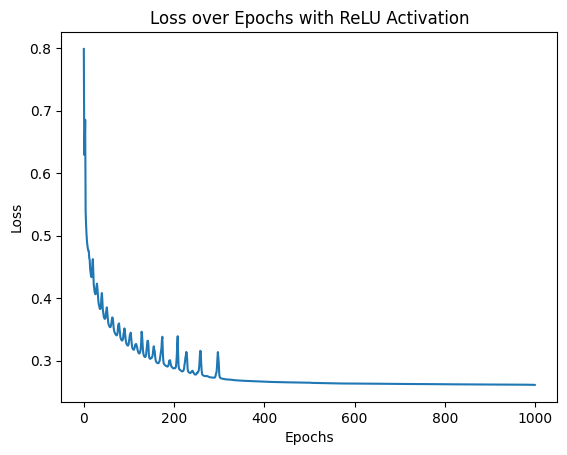

In [38]:
# Using ReLU activation
nn_relu = SimpleNeuralNetwork(input_size=X_train.shape[1], hidden_size=10, output_size=1, activation='relu', learning_rate=0.01)
losses_relu = nn_relu.train(X_train, y_train, epochs=1000)

# Plot the loss for ReLU activation
plt.plot(losses_relu)
plt.title('Loss over Epochs with ReLU Activation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
